In [3]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

The sourcec code obtained from https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/

In [4]:
df = pd.read_csv('news.csv')

In [5]:
df.shape

(6335, 4)

In [6]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [8]:
df['text']

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [9]:
X_train_pa, X_test_pa, y_train_pa, y_test_pa = train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [10]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train_pa) 
tfidf_test = tfidf_vectorizer.transform(X_test_pa)

In [11]:
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train_pa)
#DataFlair - Predict on the test set and calculate accuracy
y_pred_pa = pac.predict(tfidf_test)
score = accuracy_score(y_test_pa, y_pred_pa)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.13%


Data clean-up, delete missing datas from news.csv and save to news_clean.csv

**這段跑一次即可，不然會出現錯誤訊息，因為已經原資料已經修改過了

In [12]:
empty = []
for i in range(len(df.text)):
    if(df.text[i] == ' '):
        empty.append(i)
df = df.drop(empty)
df = df.drop(columns = ['Unnamed: 0'])
df.reset_index(drop=True)
df.to_csv('News_clean.csv')
# Save cleaned data to news_clean.csv
df_new = pd.read_csv('News_clean.csv').drop(columns = ['Unnamed: 0'])
df_new.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [13]:
df_new.shape

(6299, 3)

In [14]:
new_labels = df_new.label
new_labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [15]:
df_new['text']

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6294    The State Department told the Republican Natio...
6295    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6296     Anti-Trump Protesters Are Tools of the Oligar...
6297    ADDIS ABABA, Ethiopia —President Obama convene...
6298    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6299, dtype: object

In [16]:
df_new['text'] = df_new['text'].apply(lambda x: x.lower())  #大寫改小寫

In [17]:
#刪除標點符號
import string 
def remove_punctuations(text):
    return text.translate(None,string.punctuation)

df_new['text'] = df_new['text'].str.replace('[^\w\s]','')

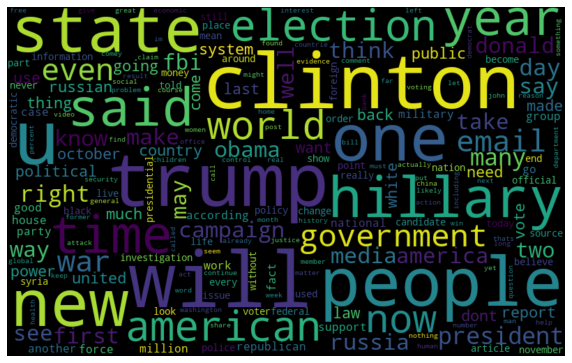

In [18]:
!pip install wordcloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
fake_data=df_new[df_new['label']=='FAKE']
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

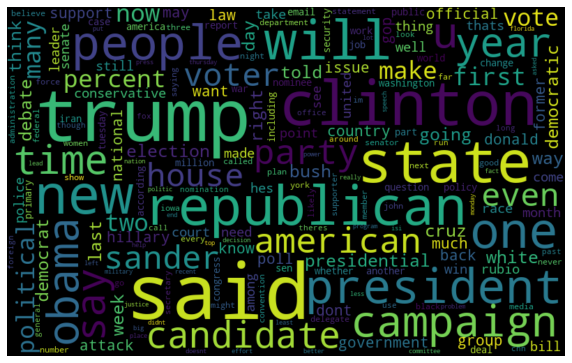

In [19]:
real_data = df_new[df_new['label'] == 'REAL']
all_words = ' '.join([text for text in real_data.text])
wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110,
    collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
import nltk
import seaborn as sns
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()


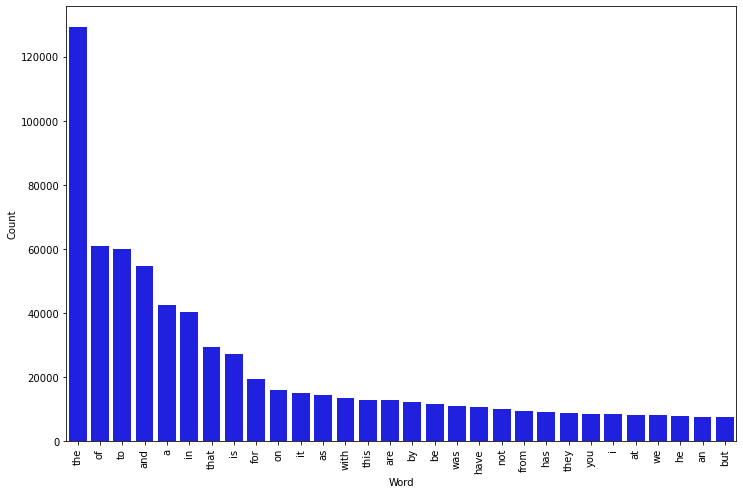

In [21]:
counter(df_new[df_new['label'] == 'FAKE'], 'text', 30)

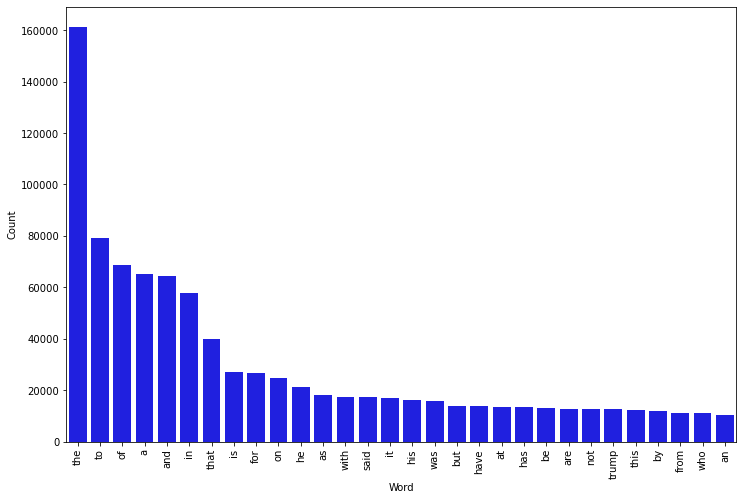

In [22]:
counter(df_new[df_new['label'] == 'REAL'],'text',30)

In [23]:
X_train_pa_new, X_test_pa_new, y_train_pa_new, y_test_pa_new = train_test_split(df_new['text'], new_labels, test_size=0.2, random_state=7)

In [24]:
tfidf_vectorizer_new = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train_new = tfidf_vectorizer_new.fit_transform(X_train_pa_new) 
tfidf_test_new = tfidf_vectorizer.transform(X_test_pa_new)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
pipe_news = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])# Fitting the model
model_news = pipe_news.fit(X_train_pa_new, y_train_pa_new)# Accuracy
prediction = model_news.predict(X_test_pa_new)
print("accuracy of logistic regression: {}%".format(round(accuracy_score(y_test_pa_new, prediction)*100,2)))
print(classification_report(y_test_pa_new, prediction))

accuracy of logistic regression: 90.95%
              precision    recall  f1-score   support

        FAKE       0.90      0.92      0.91       621
        REAL       0.92      0.90      0.91       639

    accuracy                           0.91      1260
   macro avg       0.91      0.91      0.91      1260
weighted avg       0.91      0.91      0.91      1260

